(130, 1)


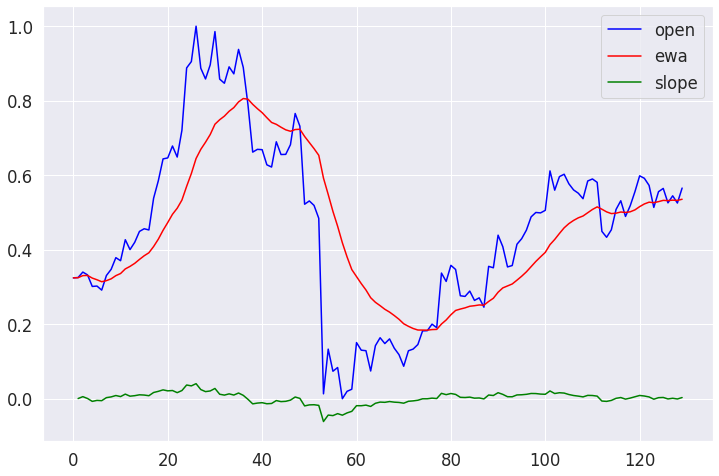

In [245]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

data = pd.DataFrame({"open":price_list})

print(data.shape)

#sc = MinMaxScaler()
#data = pd.DataFrame(sc.fit_transform(data))


ewa = data.ewm(span=20, adjust=True).mean()
slope = ewa.diff()
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(12,8))
plt.plot(data, color='blue', label='open')
plt.plot(ewa, color='red', label='ewa')
plt.plot(slope, color='green', label='slope')
plt.legend()
plt.show()
# sns.lineplot(x=data.index, y="open", data=data).set_title("Graph")

In [246]:
npslope = np.array(slope)
bought = False
sumwin = 0
for i, pt in enumerate(npslope[20:]):
    if pt > 0.005 and not bought:
        bought = price_list[20 + i]
        print("bought", i, pt)
    if pt < -0.001 and bought:
        print("Selling",i, pt)
        sumwin = sumwin + price_list[20 + i] - bought
        print(price_list[20 + i] - bought)
        bought = False
print("Total winning", sumwin)

bought 0 [0.02109575]
Selling 17 [-0.00167652]
24.757965000000013
bought 58 [0.01440941]
Selling 92 [-0.00626533]
19.484725999999995
bought 99 [0.00513552]
Selling 103 [-0.00133961]
-7.342667000000006
Total winning 36.900024
